In [1]:
# import the Iris dataset from scikit-learn
from sklearn.datasets import load_iris
# import our plotting module
import matplotlib.pyplot as plt
%matplotlib inline

# load the Iris dataset
iris = load_iris()

# seperate the features and response variable
iris_X, iris_y = iris.data, iris.target

# the names of the flower we are trying to predict.
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [2]:
# Names of the features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# for labelling: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
label_dict = {i: k for i, k in enumerate(iris.target_names)}

def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label,marker,color in zip(
    range(3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0].real[y == label],
            y=X[:,1].real[y == label],
            color=color,
            alpha=0.5,
            label=label_dict[label]
            )

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

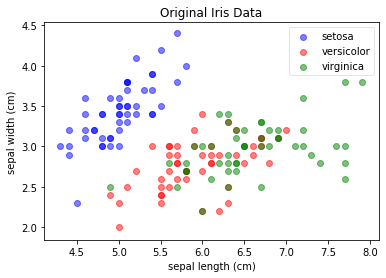

In [4]:
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")

In [6]:
# Calculate a PCA manually

# import numpy
import numpy as np

# calculate the mean vector
mean_vector = iris_X.mean(axis=0)
print(mean_vector)

# calculate the covariance matrix
cov_mat = np.cov((iris_X).T)
print(cov_mat.shape)

[5.84333333 3.05733333 3.758      1.19933333]
(4, 4)


In [7]:
cov_mat

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [8]:
# calculate the eigenvectors and eigenvalues of our covariance matrix of the iris dataset
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

# Print the eigen vectors and corresponding eigenvalues
# in order of descending eigenvalues
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i]
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_cov))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print(30 * '-')

Eigenvector 1: 
[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
Eigenvalue 1 from covariance matrix: 4.228241706034863
------------------------------
Eigenvector 2: 
[-0.65658877 -0.73016143  0.17337266  0.07548102]
Eigenvalue 2 from covariance matrix: 0.24267074792863352
------------------------------
Eigenvector 3: 
[-0.58202985  0.59791083  0.07623608  0.54583143]
Eigenvalue 3 from covariance matrix: 0.07820950004291925
------------------------------
Eigenvector 4: 
[ 0.31548719 -0.3197231  -0.47983899  0.75365743]
Eigenvalue 4 from covariance matrix: 0.023835092973449115
------------------------------


In [9]:
# the percentages of the variance captured by each eigenvalue
# is equal to the eigenvalue of that components divided by
# the sum of all eigen values
explained_variance_ratio = eig_val_cov/eig_val_cov.sum()
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

Text(0, 0.5, '% of Variance Explained <= k')

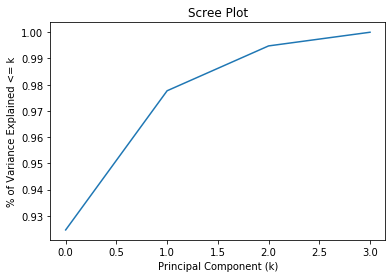

In [10]:
# Scree Plot

plt.plot(np.cumsum(explained_variance_ratio))
plt.title('Scree Plot')
plt.xlabel('Principal Component (k)')
plt.ylabel('% of Variance Explained <= k')

In [11]:
# store the top two eigenvectors in a variable
top_2_eigenvectors = eig_vec_cov[:,:2].T

# show the transpose so that each row is a principal component, we have two rows == two components
top_2_eigenvectors

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102]])

In [12]:
# to transform our data from having shape (150, 4) to (150, 2)
# we will multiply the matrices of our data and our eigen vectors together
# notice how I am centering the data first. I am doing this to replicate how scikit-learn PCA's algorithm functions
np.dot(iris_X, top_2_eigenvectors.T)[:5,]

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709]])

In [13]:
# scikit-learn's version of PCA
from sklearn.decomposition import PCA

# Like any other sklearn module, we first instantiate the class
pca = PCA(n_components=2)

# fit the PCA to our data
pca.fit(iris_X)

pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [14]:
# sklearn PCA centers the data first while transforming, so these numbers won't match our manual process.
pca.transform(iris_X)[:5,]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [15]:
# manually centering our data to match scikit-learn's implementation of PCA
np.dot(iris_X-mean_vector, top_2_eigenvectors.T)[:5,]

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451]])

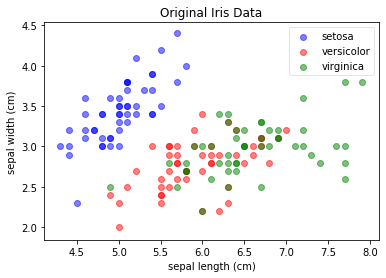

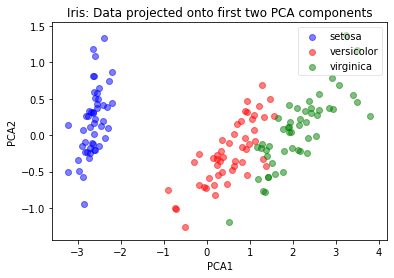

In [16]:
# Plot the original and projected data
plot(iris_X, iris_y, "Original Iris Data", "sepal length (cm)", "sepal width (cm)")
plt.show()
plot(pca.transform(iris_X), iris_y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

In [17]:
# percentage of variance in data explained by each component
# same as what we calculated earlier

pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [18]:
# show how pca attempts to eliminate dependence between columns

# capture all four principal components
full_pca = PCA(n_components=4)

# fit our PCA to the iris dataset
full_pca.fit(iris_X)

# show the correlation matrix of the original dataset
np.corrcoef(iris_X.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [19]:
# correlation coefficients above the diagonal
np.corrcoef(iris_X.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]]

array([-0.11756978,  0.87175378,  0.81794113, -0.4284401 , -0.36612593])

In [20]:
# average correlation of original iris dataset.
np.corrcoef(iris_X.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()

0.15551181623163574

In [21]:
pca_iris = full_pca.transform(iris_X)
# average correlation of PCAed iris dataset.
np.corrcoef(pca_iris.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]].mean()
# VERY close to 0 because columns are independent from one another
# This is an important consequence of performing an eigen value decomposition

1.076424409808897e-16

In [22]:
# import our scaling module
from sklearn.preprocessing import StandardScaler
# center our data, not a full scaling
X_centered = StandardScaler(with_std=False).fit_transform(iris_X)

X_centered[:5,]

array([[-0.74333333,  0.44266667, -2.358     , -0.99933333],
       [-0.94333333, -0.05733333, -2.358     , -0.99933333],
       [-1.14333333,  0.14266667, -2.458     , -0.99933333],
       [-1.24333333,  0.04266667, -2.258     , -0.99933333],
       [-0.84333333,  0.54266667, -2.358     , -0.99933333]])

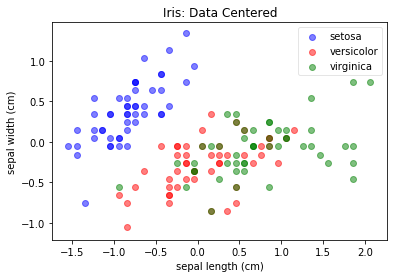

In [23]:
# Plot our centered data
plot(X_centered, iris_y, "Iris: Data Centered", "sepal length (cm)", "sepal width (cm)")

In [24]:
# fit our PCA (with n_components still set to 2) on our centered data
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
# same components as before
pca.components_  

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [26]:
# same projection when data are centered because PCA does this automatically
pca.transform(X_centered)[:5,]  

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

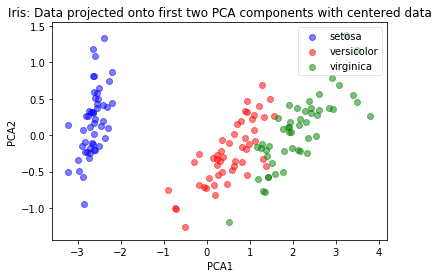

In [27]:
# Plot PCA projection of centered data, same as previous PCA projected data
plot(pca.transform(X_centered), iris_y, "Iris: Data projected onto first two PCA components with centered data", "PCA1", "PCA2")

In [28]:
# percentage of variance in data explained by each component

pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [29]:
# doing a normal z score scaling
X_scaled = StandardScaler().fit_transform(iris_X)

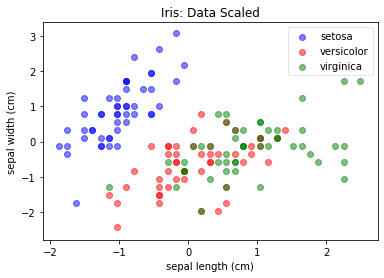

In [30]:
# Plot scaled data
plot(X_scaled, iris_y, "Iris: Data Scaled", "sepal length (cm)", "sepal width (cm)")

In [31]:
# fit our 2-dimensional PCA on our scaled data
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [32]:
# different components as cenetered data
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [33]:
# different projection when data are scaled
pca.transform(X_scaled)[:5,]  

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [34]:
# percentage of variance in data explained by each component
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

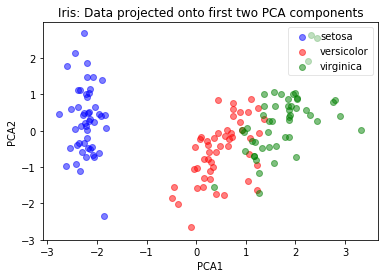

In [35]:
# Plot PCA projection of scaled data
plot(pca.transform(X_scaled), iris_y, "Iris: Data projected onto first two PCA components", "PCA1", "PCA2")

In [36]:
# how to interpret and use components
pca.components_  # a 2 x 4 matrix

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [39]:
first_scaled_flower = X_scaled[0]

In [38]:
# Multiply original matrix (150 x 4) by components transposed (4 x 2) to get new columns (150 x 2)
np.dot(X_scaled, pca.components_.T)[:5,]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [40]:
# extract the first row of our scaled data
first_scaled_flower = X_scaled[0]
# extract the two PC's
first_Pc = pca.components_[0]
second_Pc = pca.components_[1]

first_scaled_flower.shape  # (4,)

# same result as the first row of our matrix multiplication
np.dot(first_scaled_flower, first_Pc), np.dot(first_scaled_flower, second_Pc)

(-2.2647028088075896, 0.480026596520987)

In [41]:
# This is how the transform method works in pca
pca.transform(X_scaled)[:5,]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [42]:
# cut out last two columns of the original iris dataset
iris_2_dim = iris_X[:,2:4]

# center the data
iris_2_dim = iris_2_dim - iris_2_dim.mean(axis=0)

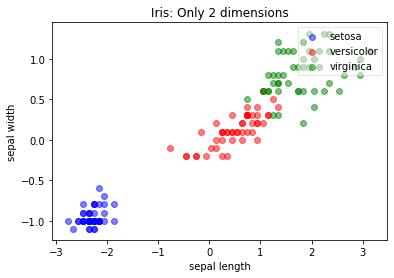

In [43]:
plot(iris_2_dim, iris_y, "Iris: Only 2 dimensions", "sepal length", "sepal width")

In [44]:
# instantiate a PCA of 2 components
twodim_pca = PCA(n_components=2)

# fit and transform our truncated iris data
iris_2_dim_transformed = twodim_pca.fit_transform(iris_2_dim)

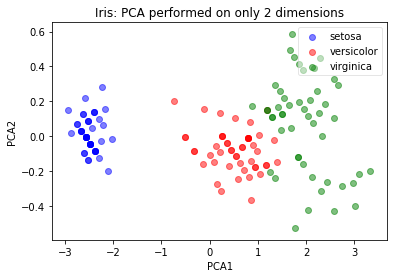

In [45]:
plot(iris_2_dim_transformed, iris_y, "Iris: PCA performed on only 2 dimensions", "PCA1", "PCA2")

[(-1, 1),
 Text(0, 0.5, 'component 2'),
 (-3, 3),
 Text(0.5, 0, 'component 1'),
 Text(0.5, 1.0, 'Projected Data')]

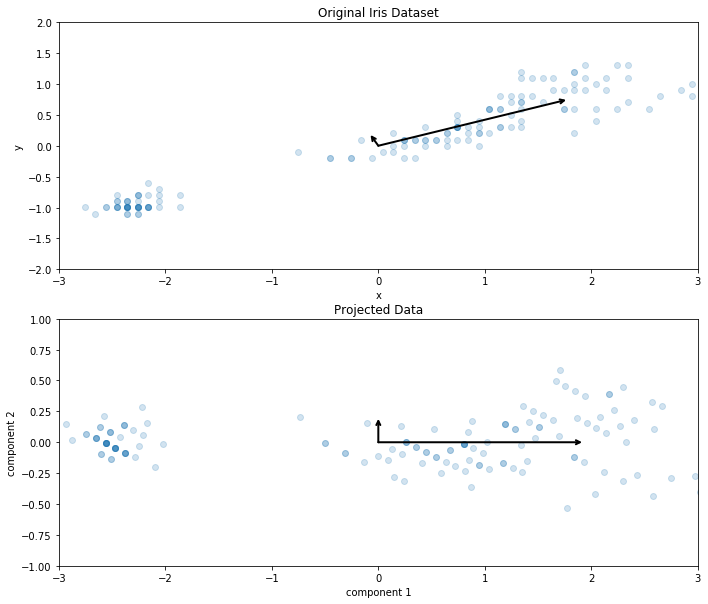

In [46]:
# This code is graphing both the original iris data and the projected version of it using PCA.
# Moreover, on each graph, the principal components are graphed as vectors on the data themselves
# The longer of the arrows is meant to describe the first principal component and
# the shorter of the arrows describes the second principal component
def draw_vector(v0, v1, ax):
    arrowprops=dict(arrowstyle='->',linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], alpha=0.2)
for length, vector in zip(twodim_pca.explained_variance_, twodim_pca.components_):
    v = vector * np.sqrt(length)  # elongdate vector to match up to explained_variance
    draw_vector(twodim_pca.mean_, 
                twodim_pca.mean_ + v, ax=ax[0])
ax[0].set(xlabel='x', ylabel='y', title='Original Iris Dataset',
         xlim=(-3, 3), ylim=(-2, 2))


ax[1].scatter(iris_2_dim_transformed[:, 0], iris_2_dim_transformed[:, 1], alpha=0.2)
for length, vector in zip(twodim_pca.explained_variance_, twodim_pca.components_):
    transformed_component = twodim_pca.transform([vector])[0]  # transform components to new coordinate system
    v = transformed_component * np.sqrt(length)  # elongdate vector to match up to explained_variance
    draw_vector(iris_2_dim_transformed.mean(axis=0),
                iris_2_dim_transformed.mean(axis=0) + v, ax=ax[1])
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='Projected Data',
          xlim=(-3, 3), ylim=(-1, 1))

# 2. 线性判别分析LDA